In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Step 1 : Create arrays
X_train = np.array([1,2,3,4,5,6,7])
Y_train = np.array([45,50,55,60,70,80,85])

In [4]:
# Step 2 : Print Shapes and ensure its 2D

print(f"X_train : {X_train}")
print(f"Y_train : {Y_train}")

# Shapes

print(f"Shape of X_train : {np.shape(X_train)}")
print(f"Shape of Y_train : {np.shape(Y_train)}")

X_train : [1 2 3 4 5 6 7]
Y_train : [45 50 55 60 70 80 85]
Shape of X_train : (7,)
Shape of Y_train : (7,)


In [5]:
# Step 3 : Reshape arrays into 2D

X_train = X_train.reshape(-1 , 1)
Y_train = Y_train.reshape(-1, 1)

# Print 

print(f"X_train : {X_train}")
print(f"Y_train : {Y_train}")

# Shapes Now

print(f"Shape of X_train : {np.shape(X_train)}")
print(f"Shape of Y_train : {np.shape(Y_train)}")

X_train : [[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]]
Y_train : [[45]
 [50]
 [55]
 [60]
 [70]
 [80]
 [85]]
Shape of X_train : (7, 1)
Shape of Y_train : (7, 1)


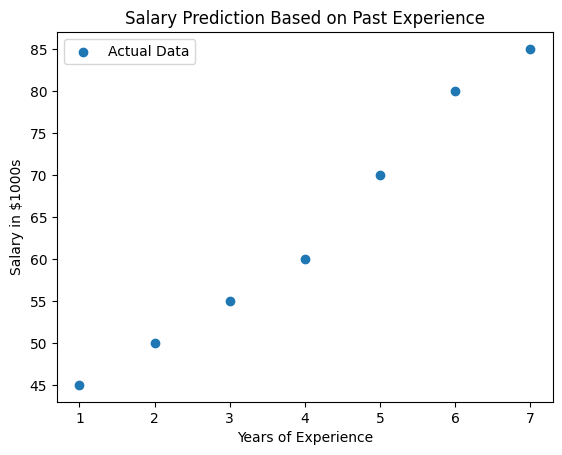

In [6]:
# Step 4 : Visualize

plt.scatter(X_train , Y_train, label = 'Actual Data')
plt.title("Salary Prediction Based on Past Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary in $1000s")
plt.legend()
plt.show()

In [7]:
# Step 5 : Initilize Parameters

w = 0
b = 0

In [8]:
# Step 6 : Define Hypothesis

def predict_output(x , w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i,0] + b
    return f_wb

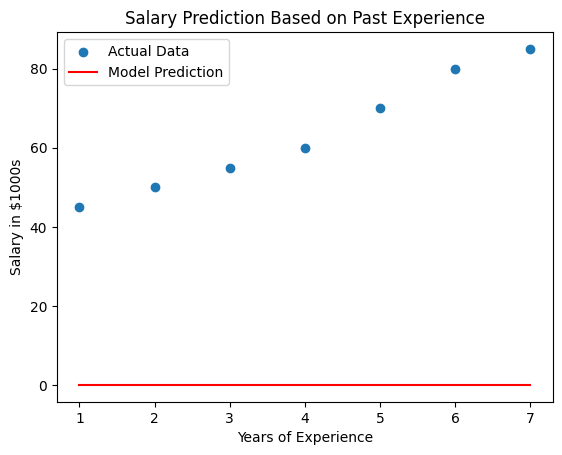

In [9]:
predicted_output = predict_output(X_train , w , b)
plt.scatter(X_train , Y_train, label = 'Actual Data')
plt.plot(X_train, predicted_output, label= "Model Prediction", c= 'r')
plt.title("Salary Prediction Based on Past Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary in $1000s")
plt.legend()
plt.show()

In [10]:
# Step 7 : Compute cost function

def compute_cost(x , y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb_x = w * x[i,0] + b
        f_wb_x_y = (f_wb_x - y[i,0])**2
        cost += f_wb_x_y
    j_wb = cost/(2*m) #outside the loop, bcz no need to do this again and again, we can do this step only once at the end, when the cost for all the samples are calculated.
    return j_wb

In [11]:
cost_1 = compute_cost(X_train, Y_train, w,b)
print(cost_1)

2119.6428571428573


In [24]:
# Set initial Values of w and b

w_init = 0
b_init = 0
#alpha = 0.1 # here the learning rate is too large, and linear regression may be jumping around the minimal point and not converging.
alpha = 0.005 # set it to small
# iterations = 100 # add more iterations around 5000
iterations = 2000

In [13]:
# Step 8 : Gradient Descent

def gradient_descent(x,y,w,b,alpha,iters):
    m = x.shape[0]
    #w = w_init
    #b = b_init
    cost_history = []

    for iter in range(iters):
        dj_dw = 0 # will accumulate sum of err * x (i)
        dj_db = 0 # will accumulate sum of err

        for i in range(m):
            # extract scaler feature value of x_i and target y_i
            # For Feature x
            if x.ndim == 2:
                x_i = x[i, 0]
            else:
                x_i = x[i]
            
            # For Target y
            if y.ndim == 2:
                y_i = y[i, 0]
            else:
                y_i = y[i]


            # Prediction using current Parameters

            f_wb = w * x_i + b
            err = f_wb - y_i

            # Accumulate contributions

            dj_dw += err * x_i   # For weight
            dj_db += err         # For error


        # Compute Average gradients (partial derivatives)
        # This is done outside the inner loop, when all the cost is calculated, then divide by m

        dj_dw = dj_dw / m
        dj_db = dj_db / m

        # Now update Parameters

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Record cost for monitoring

        cost_history.append(compute_cost(x,y,w,b))

    return w,b,cost_history




In [26]:
w_final , b_final , costs_history = gradient_descent(X_train, Y_train, w,b, alpha, iterations)
print(f"Final w : {w_final} and Final b : {b_final}")

Final w : 7.937006617838694 and Final b : 30.897429174850398


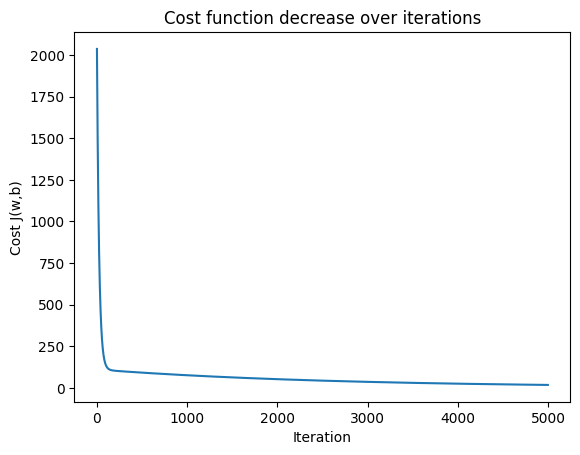

In [21]:

plt.plot(costs_history)
plt.title("Cost function decrease over iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
#plt.legend()
plt.show()

In [22]:
# Now use Linear regression model with final parameters w and b

prediction = predict_output(X_train , w_final, b_final)
print(prediction)

[32.61863832 42.12849166 51.638345   61.14819834 70.65805168 80.16790502
 89.67775836]


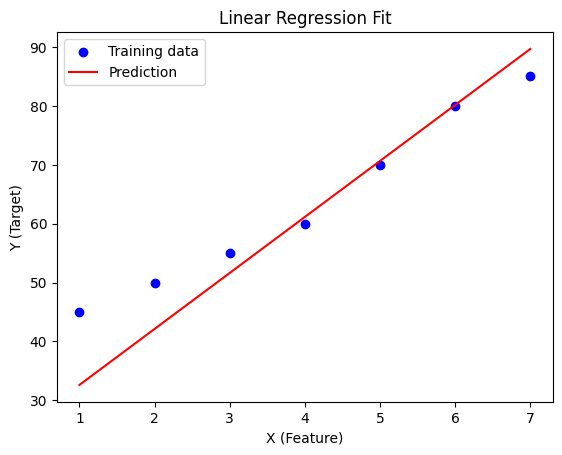

In [27]:
# Plot training data
plt.scatter(X_train, Y_train, c="b", label="Training data")

# Plot prediction line
plt.plot(X_train, prediction, c="r", label="Prediction")

plt.xlabel("X (Feature)")
plt.ylabel("Y (Target)")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()
